In [65]:
import networkx as nx
import pandas as pd
import math
import tqdm
import matplotlib.pyplot as plt
import numpy as np
# from tqdm.autonotebook import tqdm
# from tqdm.notebook import trange, tqdm
# from tqdm import tqdm_notebook

# Get data and filter

In [2]:
df = pd.read_csv('twitter_small_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,node1,node2
0,253601,1
1,20980,2
2,46231,3
3,154918,4
4,26370,5


In [3]:
G = nx.from_pandas_edgelist(df.iloc[:], source = 'node1', target = 'node2', create_using=nx.DiGraph())

In [5]:
# G.remove_nodes_from((n for n, d in list(G.in_degree()) if d<10))
G.size()

713319

About 80.0k accounts with >= 10 followers 

# Defining our centrality function

In [228]:
def new_centrality(G, gamma = 0.10, k=2, u = None):
    '''
    G: directed graph G
    gamma: discount factor
    k: degree of depth of our search (not recommended to do >3)
    u: return for only a specific set of nodes (example below)
    '''
    G = G.reverse()  # create a reversed graph view
    if u is None:
        nodes = list(G.nodes)
    else:
        nodes = u
    centrality_dict = {}
    for n in tqdm.tqdm(nodes):
        centrality_dict[n] = new_centrality_helper(G, n, gamma=gamma, k=k, curr_depth = 0)
    G = G.reverse()
    return centrality_dict

def new_centrality_helper(G, n, gamma = 0.25, k=2, curr_depth = 0):
    if (curr_depth > k):
        return 0
    centrality = 0;
    for neighbor in G.neighbors(n):
        centrality += new_centrality_helper(G, neighbor, gamma, k, curr_depth + 1)
    return math.exp(-gamma * curr_depth) + centrality

# NOTE NOTE NOTE: you should not have to find the centralities! I already did them. Instead, just upload them from the `centralities.csv` file. 

## For k=2

In [42]:
# Uncomment if you want to calculate the centralities
# centralities = new_centrality(G)

100%|██████████| 404719/404719 [01:09<00:00, 5862.58it/s] 


In [74]:
# centralities_arr = np.array(sorted(centralities.items()))

### Comparing with degree centrality

In [115]:
# deg_centralities = nx.degree_centrality(G)
# deg_centralities_arr = np.array(sorted(deg_centralities.items()))

In [116]:
# print(len(deg_centralities_arr), len(centralities_arr))

404719 404719


Text(0, 0.5, 'Our centrality')

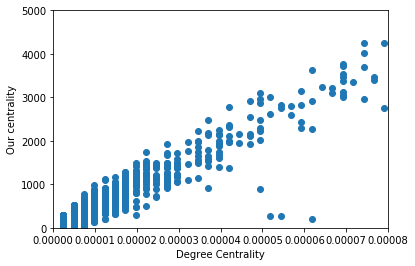

In [118]:
plt.scatter(deg_centralities_arr[:,1][:10000], centralities_arr[:,1][:10000])
plt.xlim((1e-7, 8e-5))
plt.ylim((0, 5000))
plt.xlabel("Degree Centrality")
plt.ylabel("Our centrality")

### Comparing with PageRank

In [119]:
# pageranks = nx.pagerank(G)
# pageranks_arr = np.array(sorted(pageranks.items()))

Text(0, 0.5, 'Our centrality')

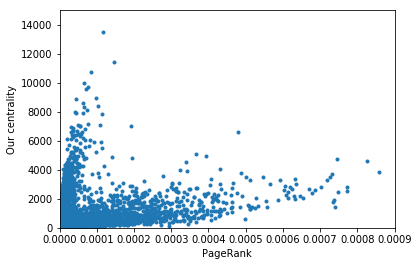

In [190]:
plt.scatter(pageranks_arr[:,1][:400000], centralities_arr[:,1][:400000], marker=".")
plt.xlim((1e-7, 9e-4))
plt.ylim((0, 15000))
plt.xlabel("PageRank")
plt.ylabel("Our centrality")

### Comparing with betweeness centrality

In [121]:
# betweenness = nx.betweenness_centrality(G)
# betweenness_arr = np.array(sorted(betweenness.items()))

In [122]:
# plt.scatter(betweenness_arr[:,1][:100000], centralities_arr[:,1][:100000], marker=".")
# plt.xlim((1e-7, 9e-4))
# plt.ylim((0, 15000))
# plt.xlabel("Betweenness")
# plt.ylabel("Our centrality")

### Comparing with closeness centrality

In [123]:
# closeness = nx.closeness_centrality(G)
# closeness_arr = np.array(sorted(closeness.items()))

Text(0, 0.5, 'Our centrality')

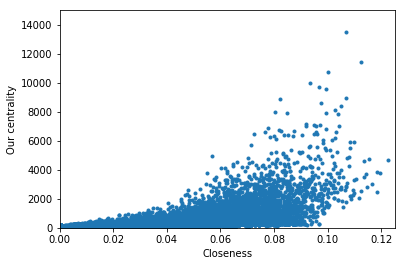

In [167]:
plt.scatter(closeness_arr[:,1][:100000], centralities_arr[:,1][:100000], marker=".")
plt.xlim((0, .125))
plt.ylim((0, 15000))
plt.xlabel("Closeness")
plt.ylabel("Our centrality")

### Degree vs pagerank

Text(0, 0.5, 'Degree Centrality')

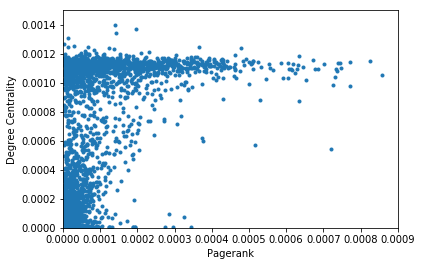

In [206]:
plt.scatter(pageranks_arr[:,1][:400000], deg_centralities_arr[:,1][:400000], marker=".")
plt.xlim((0, 0.0009))
plt.ylim((0, 0.0015))

plt.xlabel("Pagerank")
plt.ylabel("Degree Centrality")


## For k=3

In [207]:
# centralies_3 = new_centrality(G, k=3, gamma = 0.1)#, u=list(G.nodes)[:1000])

100%|██████████| 404719/404719 [40:56<00:00, 164.75it/s]   


In [229]:
# centralities_2 = list(np.array(sorted(centralities.items()))[:, 1])
# centralities_3 = list(np.array(sorted(centralies_3.items()))[:, 1])

In [222]:
# s = 1.0 / (len(G) - 1.0)
# centralities_2_new = [i * s for i in centralities_2]
# centralities_3_new = [i * s for i in centralities_3]

### Save centralities as csv

In [223]:
# import pandas as pd
# cents = {"k=2 centrality": centralities_2_new, 
#          "k=3 centrality": centralities_3_new,
#          "pagerank": list(pageranks_arr[:, 1]),
#          "degree_centrality": list(deg_centralities_arr[:, 1]), 
#          "closeness_centrality": list(closeness_arr[:, 1])}


In [224]:
# df = pd.DataFrame(cents)
# df.to_csv('centralities.csv')

In [225]:
# df_test = pd.read_csv('centralities.csv')

In [226]:
# df_test.head()

,Unnamed: 0,k=2 centrality,k=3 centrality,pagerank,degree_centrality,closeness_centrality
0,0,0.000286,0.000921,0.000002,0.000002,0.006794
1,1,0.000620,0.001890,0.000012,0.000002,0.054225
2,2,0.000174,0.002353,0.000009,0.000002,0.050009
3,3,0.000446,0.002919,0.000002,0.000002,0.033050
4,4,0.000656,0.001988,0.000021,0.000002,0.055631
